# Machine Learning Assignment 1

## Independent Variables
- Item_Identifier
- Item_Weight
- Item_Fat_Content
- Item_Visibility
- Item_Type
- Item_MRP
- Outlet_Identifier
- Outlet_Establishment_Year
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

## Dependent Variable
- Item_Outlet_Sales


In [1]:
import pandas as pd     #For general purpose Data Manipulation
import numpy as np  #For some operations - creating vectors and matrices/log transformation
from matplotlib import pyplot as plt #Plotting Box-Whisker --> Outlier Detection
import seaborn as sns  #Plotting Box-Whisker and others
from sklearn.model_selection import train_test_split #For Building Train and Test Set
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error


In [2]:
#Loading Data into a DataFrame
Sales_DF=pd.read_csv('C:/Users/Amruth PC/Desktop/Assignments_submission/ML/Assignment1_PGD B7/Train.csv')
Sales_DF

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
5              FDP36       10.395          Regular         0.000000   
6              FDO10       13.650          Regular         0.012741   
7              FDP10          NaN          Low Fat         0.127470   
8              FDH17       16.200          Regular         0.016687   
9              FDU28       19.200          Regular         0.094450   
10             FDY07       11.800          Low Fat         0.000000   
11             FDA03       18.500          Regular         0.045464   
12             FDX32       15.100          Regular         0.100014   
13             FDS46       17.600          Regular         0.047257   
14             FDF32       16.350          Low Fat         0.068024   
15             FDP49        9.000          Regular         0.069089   
16             NCB42       11.800          Low Fat         0.008596   
17             FDP49        9.000          Regular         0.069196   
18             DRI11          NaN          Low Fat         0.034238   
19             FDU02       13.350          Low Fat         0.102492   
20             FDN22       18.850          Regular         0.138190   
21             FDW12          NaN          Regular         0.035400   
22             NCB30       14.600          Low Fat         0.025698   
23             FDC37          NaN          Low Fat         0.057557   
24             FDR28       13.850          Regular         0.025896   
25             NCD06       13.000          Low Fat         0.099887   
26             FDV10        7.645          Regular         0.066693   
27             DRJ59       11.650          low fat         0.019356   
28             FDE51        5.925          Regular         0.161467   
29             FDC14          NaN          Regular         0.072222   
...              ...          ...              ...              ...   
8493           FDP21        7.420          Regular         0.025886   
8494           NCI54       15.200          Low Fat         0.000000   
8495           FDE22        9.695          Low Fat         0.029567   
8496           FDJ57        7.420          Regular         0.021696   
8497           FDT08       13.650          Low Fat         0.049209   
8498           NCP54       15.350          Low Fat         0.035293   
8499           NCK53       11.600          Low Fat         0.037574   
8500           NCQ42       20.350          Low Fat         0.000000   
8501           FDW21        5.340          Regular         0.005998   
8502           NCH43        8.420          Low Fat         0.070712   
8503           FDQ44       20.500          Low Fat         0.036133   
8504           NCN18          NaN          Low Fat         0.124111   
8505           FDB46       10.500          Regular         0.094146   
8506           DRF37       17.250          Low Fat         0.084676   
8507           FDN28        5.880          Regular         0.030242   
8508           FDW31       11.350          Regular         0.043246   
8509           FDG45        8.100          Low Fat         0.214306   
8510           FDN58       13.800          Regular         0.056862   
8511           FDF05       17.500          Low Fat         0.026980   
8512           FDR26       20.700          Low Fat         0.042801   
8513           FDH31       12.000          Regular         0.020407   
8514           FDA01       15.000          Regular         0.054489   
8515           FDH24       20.700          Low Fat         0.021518   
8516           NCJ19       18.600          Low Fat         0.118661   
8517           FDF53       20

In [3]:
Sales_DF.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
#Found unique values representing the same value in different formats
Sales_DF['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [5]:
#Applying replace to remove duplicates
Sales_DF['Item_Fat_Content']=Sales_DF['Item_Fat_Content'].replace(to_replace ="low fat", 
                 value ="Low Fat") 

In [6]:
Sales_DF['Item_Fat_Content']=Sales_DF['Item_Fat_Content'].replace(to_replace ="LF", 
                 value ="Low Fat") 

In [7]:
Sales_DF['Item_Fat_Content']=Sales_DF['Item_Fat_Content'].replace(to_replace ="reg", 
                 value ="Regular")

In [8]:
Sales_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [9]:
Sales_DF.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [10]:
#Profiling helped in understanding the dataset individually on every column 
import pandas_profiling as pd_prof

pd_prof.ProfileReport(Sales_DF)

In [11]:
dict(Sales_DF.dtypes)

{'Item_Identifier': dtype('O'),
 'Item_Weight': dtype('float64'),
 'Item_Fat_Content': dtype('O'),
 'Item_Visibility': dtype('float64'),
 'Item_Type': dtype('O'),
 'Item_MRP': dtype('float64'),
 'Outlet_Identifier': dtype('O'),
 'Outlet_Establishment_Year': dtype('int64'),
 'Outlet_Size': dtype('O'),
 'Outlet_Location_Type': dtype('O'),
 'Outlet_Type': dtype('O'),
 'Item_Outlet_Sales': dtype('float64')}

In [12]:
# Creating a new dataset with only numeric columns and variable columns
numeric_var_names=[key for key in dict(Sales_DF.dtypes) if dict(Sales_DF.dtypes)[key] in ['float64', 'int64']]
catag_var_names=[key for key in dict(Sales_DF.dtypes) if dict(Sales_DF.dtypes)[key] in [ 'O']]
print(numeric_var_names)
print(catag_var_names)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [13]:
Sales_DF_num=Sales_DF[numeric_var_names]
Sales_DF_num.head(5)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

In [14]:
Sales_DF_cat=Sales_DF[catag_var_names]
Sales_DF_cat.head(5)

Item_Identifier Item_Fat_Content              Item_Type Outlet_Identifier  \
0           FDA15          Low Fat                  Dairy            OUT049   
1           DRC01          Regular            Soft Drinks            OUT018   
2           FDN15          Low Fat                   Meat            OUT049   
3           FDX07          Regular  Fruits and Vegetables            OUT010   
4           NCD19          Low Fat              Household            OUT013   

  Outlet_Size Outlet_Location_Type        Outlet_Type  
0      Medium               Tier 1  Supermarket Type1  
1      Medium               Tier 3  Supermarket Type2  
2      Medium               Tier 1  Supermarket Type1  
3         NaN               Tier 3      Grocery Store  
4        High               Tier 3  Supermarket Type1

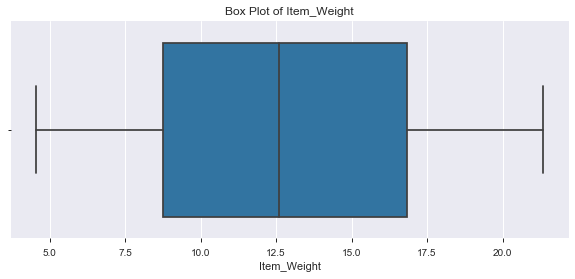

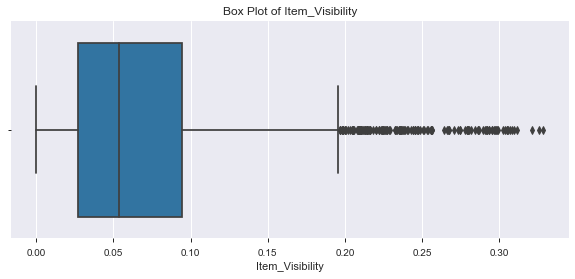

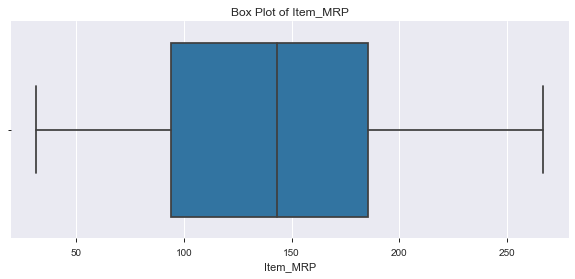

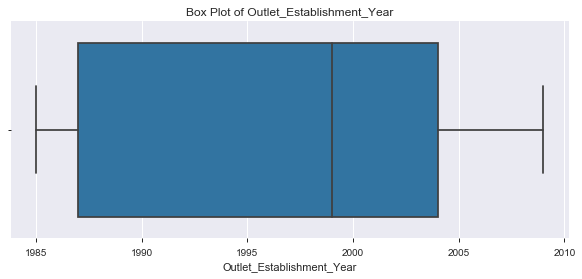

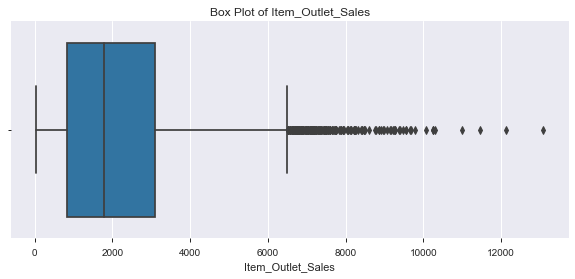

In [15]:
#Checking box lots to undestand the outliers resent in the numerical columns
for num_variable in numeric_var_names:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot( x=num_variable, data = Sales_DF_num)
    plt.title(str('Box Plot of ') + str(num_variable))

In [16]:
#Capping to remove outliers in all numerical columns
def outlier_capping(x):
    ul = x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))
    ll = x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))
    x = x.clip_upper(ul)
    x = x.clip_lower(ll)
    return x

Sales_DF_num=Sales_DF_num.apply(lambda x: outlier_capping(x))
Sales_DF_num.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                     1999.0   
1         5.92         0.019278   48.2692                     2009.0   
2        17.50         0.016760  141.6180                     1999.0   
3        19.20         0.000000  182.0950                     1998.0   
4         8.93         0.000000   53.8614                     1987.0   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

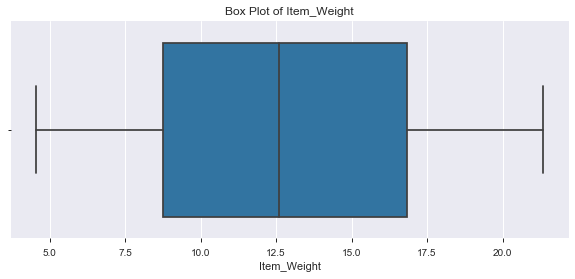

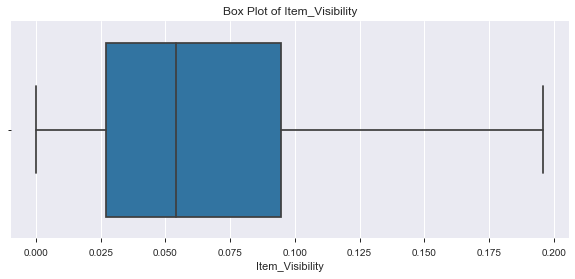

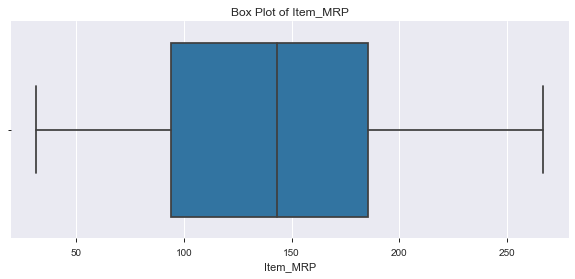

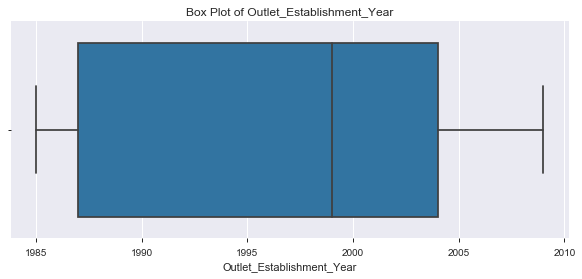

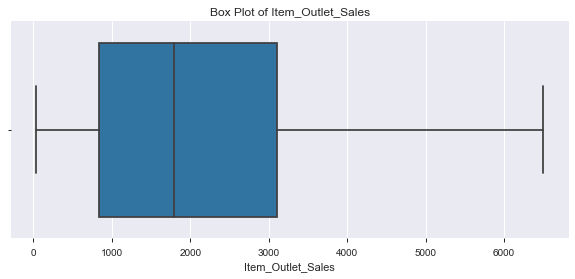

In [17]:
#Box plots after removing outliers
for num_variable in numeric_var_names:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot( x=num_variable, data = Sales_DF_num)
    plt.title(str('Box Plot of ') + str(num_variable))

In [18]:
#Handling missings values - imputing with the mean
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

Sales_DF_num=Sales_DF_num.apply(lambda x: Missing_imputation(x))

In [19]:
#Using profile to check the change after imputation
pd_prof.ProfileReport(Sales_DF_num)

# Graphs with log transformation and without transformation to control skewness

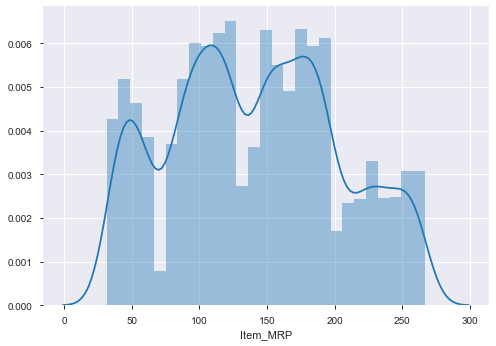

In [20]:
#Graph without log transformation
sns.distplot(Sales_DF_num.Item_MRP)

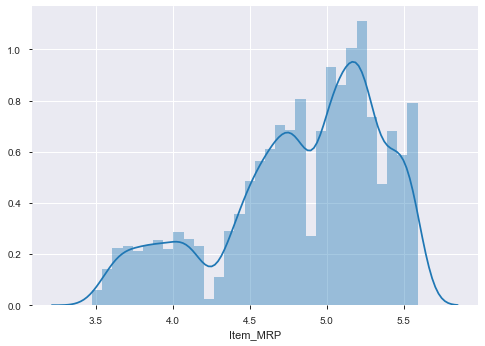

In [21]:
#Using Log Tranformation to control skewness in the data
Sales_DF_num["Item_MRP"]= np.log(Sales_DF_num["Item_MRP"]+1)
sns.distplot(Sales_DF_num.Item_MRP)

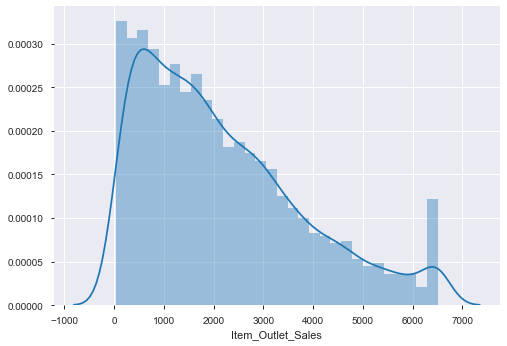

In [22]:
#Graph without log transformation
sns.distplot(Sales_DF_num.Item_Outlet_Sales)

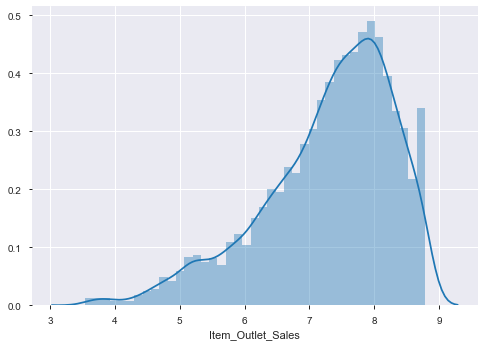

In [23]:
Sales_DF_num["Item_Outlet_Sales"]= np.log(Sales_DF_num["Item_Outlet_Sales"]+1)
sns.distplot(Sales_DF_num.Item_Outlet_Sales)

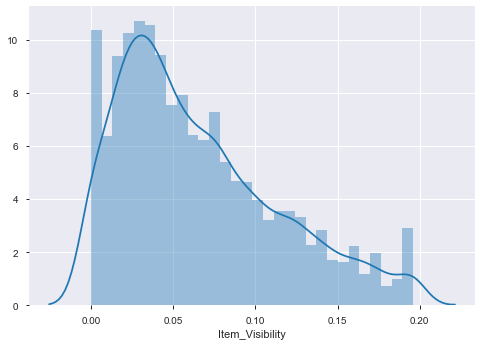

In [24]:
sns.distplot(Sales_DF_num.Item_Visibility)

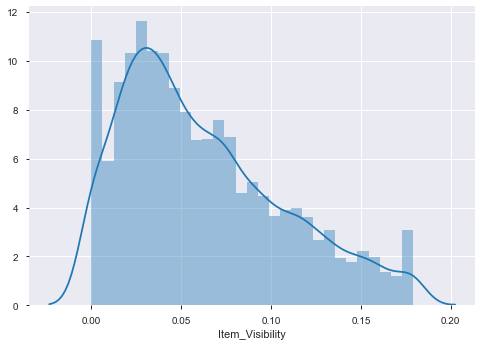

In [25]:
Sales_DF_num["Item_Visibility"]= np.log(Sales_DF_num["Item_Visibility"]+1)
sns.distplot(Sales_DF_num.Item_Visibility)

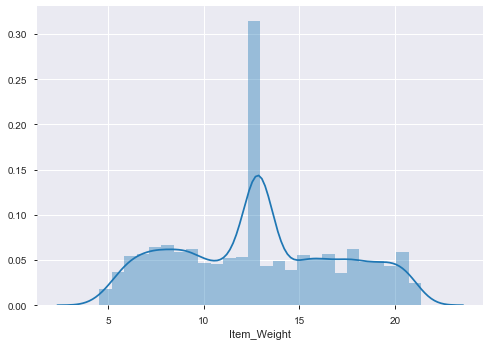

In [26]:
sns.distplot(Sales_DF_num.Item_Weight)

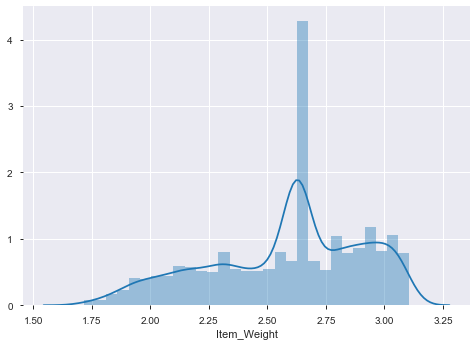

In [27]:
Sales_DF_num["Item_Weight"]= np.log(Sales_DF_num["Item_Weight"]+1)
sns.distplot(Sales_DF_num.Item_Weight)


In [28]:
#Model after control the skewness
Sales_DF_updated = pd.concat([Sales_DF_num, Sales_DF_cat], axis=1)
Sales_DF_updated.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     2.332144         0.015920  5.524692                     1999.0   
1     1.934416         0.019095  3.897299                     2009.0   
2     2.917771         0.016621  4.960170                     1999.0   
3     3.005683         0.000000  5.210005                     1998.0   
4     2.295560         0.000000  4.004810                     1987.0   

   Item_Outlet_Sales Item_Identifier Item_Fat_Content              Item_Type  \
0           8.225808           FDA15          Low Fat                  Dairy   
1           6.096776           DRC01          Regular            Soft Drinks   
2           7.648868           FDN15          Low Fat                   Meat   
3           6.597664           FDX07          Regular  Fruits and Vegetables   
4           6.903451           NCD19          Low Fat              Household   

  Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
0            OUT049      Medium               Tier 1  Supermarket Type1  
1            OUT018      Medium               Tier 3  Supermarket Type2  
2            OUT049      Medium               Tier 1  Supermarket Type1  
3            OUT010         NaN               Tier 3      Grocery Store  
4            OUT013        High               Tier 3  Supermarket Type1

In [29]:
Sales_DF_updated.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [30]:
Sales_DF_updated.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     2.332144         0.015920  5.524692                     1999.0   
1     1.934416         0.019095  3.897299                     2009.0   
2     2.917771         0.016621  4.960170                     1999.0   
3     3.005683         0.000000  5.210005                     1998.0   
4     2.295560         0.000000  4.004810                     1987.0   

   Item_Outlet_Sales Item_Identifier Item_Fat_Content              Item_Type  \
0           8.225808           FDA15          Low Fat                  Dairy   
1           6.096776           DRC01          Regular            Soft Drinks   
2           7.648868           FDN15          Low Fat                   Meat   
3           6.597664           FDX07          Regular  Fruits and Vegetables   
4           6.903451           NCD19          Low Fat              Household   

  Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
0            OUT049      Medium               Tier 1  Supermarket Type1  
1            OUT018      Medium               Tier 3  Supermarket Type2  
2            OUT049      Medium               Tier 1  Supermarket Type1  
3            OUT010         NaN               Tier 3      Grocery Store  
4            OUT013        High               Tier 3  Supermarket Type1

In [31]:
#Applying Label encoding on the categorical columns
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
Sales_DF_updated['Item_Identifier']=labelencoder_X.fit_transform(Sales_DF_updated['Item_Identifier'])
Sales_DF_updated['Item_Fat_Content']=labelencoder_X.fit_transform(Sales_DF_updated['Item_Fat_Content'])
Sales_DF_updated['Item_Type']=labelencoder_X.fit_transform(Sales_DF_updated['Item_Type'])
Sales_DF_updated['Outlet_Location_Type']=labelencoder_X.fit_transform(Sales_DF_updated['Outlet_Location_Type'])
Sales_DF_updated['Outlet_Type']=labelencoder_X.fit_transform(Sales_DF_updated['Outlet_Type'])
Sales_DF_updated['Outlet_Identifier']=labelencoder_X.fit_transform(Sales_DF_updated['Outlet_Identifier'])

In [32]:
Sales_DF_updated.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     2.332144         0.015920  5.524692                     1999.0   
1     1.934416         0.019095  3.897299                     2009.0   
2     2.917771         0.016621  4.960170                     1999.0   
3     3.005683         0.000000  5.210005                     1998.0   
4     2.295560         0.000000  4.004810                     1987.0   

   Item_Outlet_Sales  Item_Identifier  Item_Fat_Content  Item_Type  \
0           8.225808              156                 0          4   
1           6.096776                8                 1         14   
2           7.648868              662                 0         10   
3           6.597664             1121                 1          6   
4           6.903451             1297                 0          9   

   Outlet_Identifier Outlet_Size  Outlet_Location_Type  Outlet_Type  
0                  9      Medium                     0            1  
1                  3      Medium                     2            2  
2                  9      Medium                     0            1  
3                  0         NaN                     2            0  
4                  1        High                     2            1

# Using Bayes to impute the categorical variable Outlet_Size by developing a model

In [33]:
#1st step removing null valued columns from the Dataset
Imputer_apply=Sales_DF_updated[Sales_DF_updated['Outlet_Size'].isnull()][['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type','Outlet_Size']]
Imputer_apply.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
3      3.005683         0.000000  5.210005                     1998.0   
8      2.844909         0.016549  4.584688                     2002.0   
9      3.005683         0.090252  5.240802                     2007.0   
25     2.639057         0.095208  3.848146                     2007.0   
28     1.935138         0.149683  3.839637                     1998.0   

    Item_Outlet_Sales  Item_Identifier  Item_Fat_Content  Item_Type  \
3            6.597664             1121                 1          6   
8            6.982490              440                 1          5   
9            8.457769              990                 1          5   
25           6.733292             1294                 0          9   
28           5.189810              350                 1          4   

    Outlet_Identifier  Outlet_Location_Type  Outlet_Type Outlet_Size  
3                   0                     2            0         NaN  
8                   7                     1            1         NaN  
9                   2                     1            1         NaN  
25                  2                     1            1         NaN  
28                  0                     2            0         NaN

In [34]:
#2nd step collecing the non null values to prepare a model for applying Bayes
Imputer_train=Sales_DF_updated[Sales_DF_updated['Outlet_Size'].notnull()][['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type','Outlet_Size']]
Imputer_train.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     2.332144         0.015920  5.524692                     1999.0   
1     1.934416         0.019095  3.897299                     2009.0   
2     2.917771         0.016621  4.960170                     1999.0   
4     2.295560         0.000000  4.004810                     1987.0   
5     2.433175         0.000000  3.958922                     2009.0   

   Item_Outlet_Sales  Item_Identifier  Item_Fat_Content  Item_Type  \
0           8.225808              156                 0          4   
1           6.096776                8                 1         14   
2           7.648868              662                 0         10   
4           6.903451             1297                 0          9   
5           6.323658              758                 1          0   

   Outlet_Identifier  Outlet_Location_Type  Outlet_Type Outlet_Size  
0                  9                     0            1      Medium  
1                  3                     2            2      Medium  
2                  9                     0            1      Medium  
4                  1                     2            1        High  
5                  3                     2            2      Medium

In [35]:
#Collected independent variables to train and test
X_train_main=Imputer_train[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type']]

In [36]:
#Collected dependent variable to train and test
Y_train_main=Imputer_train[['Outlet_Size']]

In [37]:
#Null valued independent variables data assigned to test variable
X_test_main=Imputer_apply[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type']]

In [38]:
#Dependent Null values and target column
Y_test_main=Imputer_apply[['Outlet_Size']]
Y_test_main.head()

Outlet_Size
3          NaN
8          NaN
9          NaN
25         NaN
28         NaN

In [39]:
#Applying Naive Bayes
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix

In [40]:
#Preparing train and test model from non null valued dependent and independent data
x_train,x_test,y_train,y_test = train_test_split(X_train_main,Y_train_main,test_size=0.20,random_state=3)

In [41]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
#Prediction imputation worked well with a score of 84.5% 
print("Guassian Score=",gnb.score(x_test,y_test)*100)
prediction = gnb.predict(x_test)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

Guassian Score= 83.72853638593622
Confusion Matrix is :
[[171   0   0]
 [  0 370 199]
 [  0   0 483]]


In [43]:
#Using model developed to predict null values
prediction_to_apply = gnb.predict(X_test_main)
prediction_to_apply

array(['Medium', 'Small', 'Medium', ..., 'Medium', 'Small', 'Small'],
      dtype='<U6')

In [44]:
Y_test_main=pd.DataFrame(prediction_to_apply)
Y_test_main.columns=['Outlet_Size']


In [45]:
#Combining the data set using concat to prepare the model back into old state
Sales_DF_train = pd.concat([X_train_main, Y_train_main], axis=1)
Sales_DF_train.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     2.332144         0.015920  5.524692                     1999.0   
1     1.934416         0.019095  3.897299                     2009.0   
2     2.917771         0.016621  4.960170                     1999.0   
4     2.295560         0.000000  4.004810                     1987.0   
5     2.433175         0.000000  3.958922                     2009.0   

   Item_Outlet_Sales  Item_Identifier  Item_Fat_Content  Item_Type  \
0           8.225808              156                 0          4   
1           6.096776                8                 1         14   
2           7.648868              662                 0         10   
4           6.903451             1297                 0          9   
5           6.323658              758                 1          0   

   Outlet_Identifier  Outlet_Location_Type  Outlet_Type Outlet_Size  
0                  9                     0            1      Medium  
1                  3                     2            2      Medium  
2                  9                     0            1      Medium  
4                  1                     2            1        High  
5                  3                     2            2      Medium

In [46]:
X_test_main.index

Int64Index([   3,    8,    9,   25,   28,   30,   33,   45,   46,   47,
            ...
            8493, 8494, 8496, 8500, 8501, 8502, 8508, 8509, 8514, 8519],
           dtype='int64', length=2410)

In [47]:
X_test_main.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
3      3.005683         0.000000  5.210005                     1998.0   
8      2.844909         0.016549  4.584688                     2002.0   
9      3.005683         0.090252  5.240802                     2007.0   
25     2.639057         0.095208  3.848146                     2007.0   
28     1.935138         0.149683  3.839637                     1998.0   

    Item_Outlet_Sales  Item_Identifier  Item_Fat_Content  Item_Type  \
3            6.597664             1121                 1          6   
8            6.982490              440                 1          5   
9            8.457769              990                 1          5   
25           6.733292             1294                 0          9   
28           5.189810              350                 1          4   

    Outlet_Identifier  Outlet_Location_Type  Outlet_Type  
3                   0                     2            0  
8                   7                     1            1  
9                   2                     1            1  
25                  2                     1            1  
28                  0                     2            0

In [48]:
#Equating index values so concat gets applied on index values
Y_test_main.index=X_test_main.index
Y_test_main.head()

Outlet_Size
3       Medium
8        Small
9       Medium
25      Medium
28      Medium

In [49]:
#Concatenating the predicted value
Sales_DF_test = pd.concat([X_test_main, Y_test_main], axis=1)
Sales_DF_test.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
3      3.005683         0.000000  5.210005                     1998.0   
8      2.844909         0.016549  4.584688                     2002.0   
9      3.005683         0.090252  5.240802                     2007.0   
25     2.639057         0.095208  3.848146                     2007.0   
28     1.935138         0.149683  3.839637                     1998.0   

    Item_Outlet_Sales  Item_Identifier  Item_Fat_Content  Item_Type  \
3            6.597664             1121                 1          6   
8            6.982490              440                 1          5   
9            8.457769              990                 1          5   
25           6.733292             1294                 0          9   
28           5.189810              350                 1          4   

    Outlet_Identifier  Outlet_Location_Type  Outlet_Type Outlet_Size  
3                   0                     2            0      Medium  
8                   7                     1            1       Small  
9                   2                     1            1      Medium  
25                  2                     1            1      Medium  
28                  0                     2            0      Medium

In [50]:
#Concateinating the predicted and Non null data set
Sales_DF_Main = pd.concat([Sales_DF_train, Sales_DF_test], axis=0)
Sales_DF_Main=Sales_DF_Main.sort_index()

In [51]:
Sales_DF_Main.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     2.332144         0.015920  5.524692                     1999.0   
1     1.934416         0.019095  3.897299                     2009.0   
2     2.917771         0.016621  4.960170                     1999.0   
3     3.005683         0.000000  5.210005                     1998.0   
4     2.295560         0.000000  4.004810                     1987.0   

   Item_Outlet_Sales  Item_Identifier  Item_Fat_Content  Item_Type  \
0           8.225808              156                 0          4   
1           6.096776                8                 1         14   
2           7.648868              662                 0         10   
3           6.597664             1121                 1          6   
4           6.903451             1297                 0          9   

   Outlet_Identifier  Outlet_Location_Type  Outlet_Type Outlet_Size  
0                  9                     0            1      Medium  
1                  3                     2            2      Medium  
2                  9                     0            1      Medium  
3                  0                     2            0      Medium  
4                  1                     2            1        High

In [52]:
#Applying lable encoding on Predicted Outlet_Size column
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
Sales_DF_Main['Outlet_Size']=labelencoder_X.fit_transform(Sales_DF_Main['Outlet_Size'])

In [53]:
Sales_DF_Main.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size'],
      dtype='object')

In [54]:
#X is the model with Independent variables 
X=Sales_DF_Main[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size']]

In [55]:
#Y is the model with Target Variable
Y=Sales_DF_Main[['Item_Outlet_Sales']]

In [56]:
#Spliting the data set into train and test models
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=1/3,random_state=3)

# Applying Linear Regression with out applying One hot to veriy the R2 score

In [57]:
#Applying Linear regression on the test and train data set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
lr=regressor.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

y_pred=regressor.predict(x_test)
y_pred


[[-1.52816865e-02 -1.11317254e+00  1.01686552e+00  1.93034774e-02
  -5.92122011e-07  2.50390265e-02 -3.67558414e-04  1.20925374e-01
  -2.98860923e-02  5.08602339e-01 -4.12951101e-01]]
[-36.71258111]


array([[7.35870995],
       [7.0715112 ],
       [6.8444464 ],
       ...,
       [8.32107066],
       [7.77622273],
       [4.97894357]])

In [58]:
#Finding the R2 score
from sklearn.metrics import r2_score
R2score=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE :',rmse) 
print('R2 :',R2score)

RMSE : 0.6288022118544102
R2 : 0.6169898867719222


Text(0.5, 1.0, 'Residual Plot')

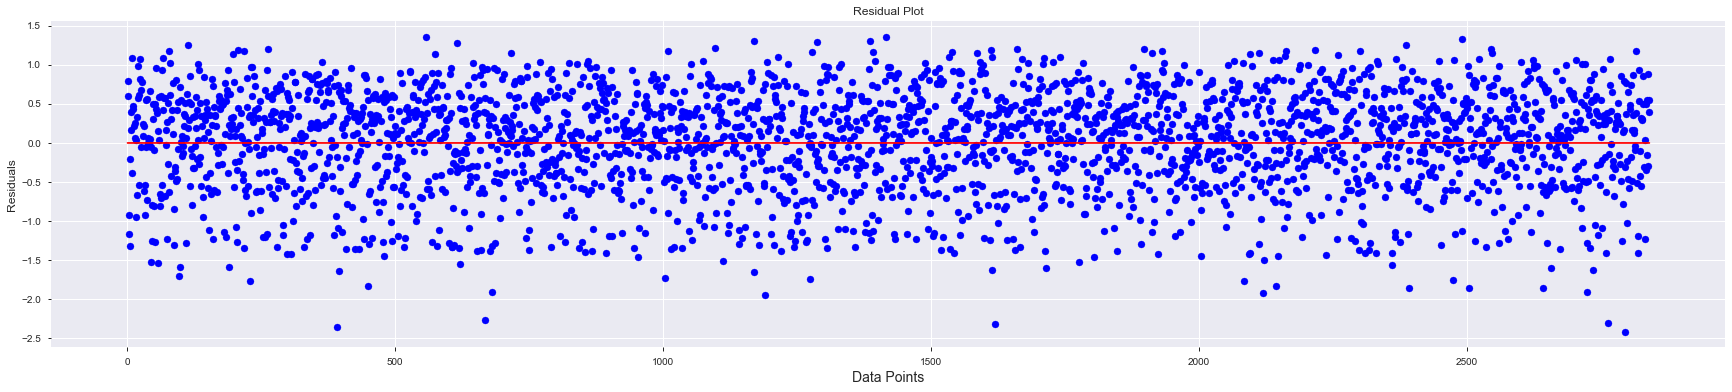

In [59]:
f=[i for i in range(1,len(y_pred)+1)]
plt.figure(figsize=(30,6))
plt.scatter(f,(y_test-y_pred),color='blue')
plt.plot(f,y_pred*0,color='red')
plt.ylabel("Residuals",fontsize=12)
plt.xlabel("Data Points",fontsize=14)
plt.title('Residual Plot')

In [60]:
#Root Mean Square Error
from sklearn.metrics import mean_squared_error 

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Square Error",rmse)

Root Mean Square Error 0.6288022118544102


In [61]:
Sales_DF_Main.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     2.332144         0.015920  5.524692                     1999.0   
1     1.934416         0.019095  3.897299                     2009.0   
2     2.917771         0.016621  4.960170                     1999.0   
3     3.005683         0.000000  5.210005                     1998.0   
4     2.295560         0.000000  4.004810                     1987.0   

   Item_Outlet_Sales  Item_Identifier  Item_Fat_Content  Item_Type  \
0           8.225808              156                 0          4   
1           6.096776                8                 1         14   
2           7.648868              662                 0         10   
3           6.597664             1121                 1          6   
4           6.903451             1297                 0          9   

   Outlet_Identifier  Outlet_Location_Type  Outlet_Type  Outlet_Size  
0                  9                     0            1            1  
1                  3                     2            2            1  
2                  9                     0            1            1  
3                  0                     2            0            1  
4                  1                     2            1            0

# Applying Backend Elimination to develop a model by removing the columns which are with out Threshold Pvalue<0.05 (Feature Selection)

In [62]:
X=Sales_DF_Main[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size']]

In [63]:
X['Ones']=1

In [64]:
X=X[['Ones','Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size']]

In [65]:
X.head()

Ones  Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     1     2.332144         0.015920  5.524692                     1999.0   
1     1     1.934416         0.019095  3.897299                     2009.0   
2     1     2.917771         0.016621  4.960170                     1999.0   
3     1     3.005683         0.000000  5.210005                     1998.0   
4     1     2.295560         0.000000  4.004810                     1987.0   

   Item_Identifier  Item_Fat_Content  Item_Type  Outlet_Identifier  \
0              156                 0          4                  9   
1                8                 1         14                  3   
2              662                 0         10                  9   
3             1121                 1          6                  0   
4             1297                 0          9                  1   

   Outlet_Location_Type  Outlet_Type  Outlet_Size  
0                     0            1            1  
1                     2            2            1  
2                     0            1            1  
3                     2            0            1  
4                     2            1            0

In [66]:
Y=Sales_DF_Main[['Item_Outlet_Sales']]
Y.head()

Item_Outlet_Sales
0           8.225808
1           6.096776
2           7.648868
3           6.597664
4           6.903451

In [67]:
import statsmodels.api as sm
regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1202.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:54:08   Log-Likelihood:                -8181.5
No. Observations:                8523   AIC:                         1.639e+04
Df Residuals:                    8511   BIC:                         1.647e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Ones                        -38.0096      1.726    -22.023      0.000     -41.393     -34.627
Item_Weight                  -0.0314      0.021     -1.498      0.134      -0.072       0.010
Item_Visibility              -1.2511      0.156     -8.034      0.000      -1.556      -0.946
Item_MRP                      1.0215      0.013     77.523      0.000       0.996       1.047
Outlet_Establishment_Year     0.0200      0.001     23.144      0.000       0.018       0.022
Item_Identifier           -5.073e-06   1.54e-05     -0.330      0.742   -3.52e-05    2.51e-05
Item_Fat_Content              0.0161      0.015      1.101      0.271      -0.013       0.045
Item_Type                    -0.0003      0.002     -0.202      0.840      -0.004       0.003
Outlet_Identifier             0.1159      0.005     22.042      0.000       0.106       0.126
Outlet_Location_Type         -0.0556      0.019     -2.892      0.004      -0.093      -0.018
Outlet_Type                   0.5257      0.014     37.104      0.000       0.498       0.554
Outlet_Size                  -0.4103      0.015    -28.115      0.000      -0.439      -0.382
==============================================================================
Omnibus:                      381.116   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.939
Skew:                          -0.548   Prob(JB):                     9.74e-95
Kurtosis:                       3.137   Cond. No.                     5.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
#Removed Item_Type as P values is found as 0.824
import statsmodels.api as sm
X=X[['Ones','Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier',
       'Item_Fat_Content', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size']]

regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1323.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:54:08   Log-Likelihood:                -8181.5
No. Observations:                8523   AIC:                         1.638e+04
Df Residuals:                    8512   BIC:                         1.646e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Ones                        -38.0101      1.726    -22.025      0.000     -41.393     -34.627
Item_Weight                  -0.0315      0.021     -1.505      0.132      -0.073       0.010
Item_Visibility              -1.2502      0.156     -8.032      0.000      -1.555      -0.945
Item_MRP                      1.0214      0.013     77.568      0.000       0.996       1.047
Outlet_Establishment_Year     0.0200      0.001     23.144      0.000       0.018       0.022
Item_Identifier           -4.958e-06   1.54e-05     -0.323      0.747   -3.51e-05    2.52e-05
Item_Fat_Content              0.0165      0.014      1.141      0.254      -0.012       0.045
Outlet_Identifier             0.1159      0.005     22.043      0.000       0.106       0.126
Outlet_Location_Type         -0.0556      0.019     -2.893      0.004      -0.093      -0.018
Outlet_Type                   0.5258      0.014     37.107      0.000       0.498       0.554
Outlet_Size                  -0.4103      0.015    -28.117      0.000      -0.439      -0.382
==============================================================================
Omnibus:                      381.224   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              433.078
Skew:                          -0.548   Prob(JB):                     9.09e-95
Kurtosis:                       3.137   Cond. No.                     5.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#Removed Item_Identifier as P values is found as 0.727
import statsmodels.api as sm
X=X[['Ones','Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year',
       'Item_Fat_Content', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size']]

regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1470.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:54:08   Log-Likelihood:                -8181.5
No. Observations:                8523   AIC:                         1.638e+04
Df Residuals:                    8513   BIC:                         1.645e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Ones                        -38.0212      1.725    -22.037      0.000     -41.403     -34.639
Item_Weight                  -0.0317      0.021     -1.517      0.129      -0.073       0.009
Item_Visibility              -1.2489      0.156     -8.027      0.000      -1.554      -0.944
Item_MRP                      1.0213      0.013     77.580      0.000       0.995       1.047
Outlet_Establishment_Year     0.0200      0.001     23.152      0.000       0.018       0.022
Item_Fat_Content              0.0170      0.014      1.185      0.236      -0.011       0.045
Outlet_Identifier             0.1159      0.005     22.049      0.000       0.106       0.126
Outlet_Location_Type         -0.0556      0.019     -2.892      0.004      -0.093      -0.018
Outlet_Type                   0.5257      0.014     37.109      0.000       0.498       0.554
Outlet_Size                  -0.4103      0.015    -28.124      0.000      -0.439      -0.382
==============================================================================
Omnibus:                      381.006   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.797
Skew:                          -0.548   Prob(JB):                     1.05e-94
Kurtosis:                       3.137   Cond. No.                     5.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
#Removed Item_Fat_Content as P values is found as 0.228
import statsmodels.api as sm
X=X[['Ones','Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size']]

regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1653.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:54:08   Log-Likelihood:                -8182.2
No. Observations:                8523   AIC:                         1.638e+04
Df Residuals:                    8514   BIC:                         1.645e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Ones                        -38.0335      1.725    -22.044      0.000     -41.416     -34.651
Item_Weight                  -0.0323      0.021     -1.542      0.123      -0.073       0.009
Item_Visibility              -1.2394      0.155     -7.976      0.000      -1.544      -0.935
Item_MRP                      1.0214      0.013     77.591      0.000       0.996       1.047
Outlet_Establishment_Year     0.0200      0.001     23.164      0.000       0.018       0.022
Outlet_Identifier             0.1159      0.005     22.050      0.000       0.106       0.126
Outlet_Location_Type         -0.0557      0.019     -2.898      0.004      -0.093      -0.018
Outlet_Type                   0.5259      0.014     37.120      0.000       0.498       0.554
Outlet_Size                  -0.4105      0.015    -28.138      0.000      -0.439      -0.382
==============================================================================
Omnibus:                      380.383   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.002
Skew:                          -0.547   Prob(JB):                     1.56e-94
Kurtosis:                       3.137   Cond. No.                     5.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
#Removed Item_Weight as P values is found as 0.120
import statsmodels.api as sm
X=X[['Ones', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size']]

regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1889.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:54:08   Log-Likelihood:                -8183.4
No. Observations:                8523   AIC:                         1.638e+04
Df Residuals:                    8515   BIC:                         1.644e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Ones                        -38.2576      1.719    -22.251      0.000     -41.628     -34.887
Item_Visibility              -1.2372      0.155     -7.962      0.000      -1.542      -0.933
Item_MRP                      1.0210      0.013     77.569      0.000       0.995       1.047
Outlet_Establishment_Year     0.0201      0.001     23.278      0.000       0.018       0.022
Outlet_Identifier             0.1161      0.005     22.098      0.000       0.106       0.126
Outlet_Location_Type         -0.0551      0.019     -2.866      0.004      -0.093      -0.017
Outlet_Type                   0.5252      0.014     37.086      0.000       0.497       0.553
Outlet_Size                  -0.4109      0.015    -28.162      0.000      -0.439      -0.382
==============================================================================
Omnibus:                      378.685   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              429.862
Skew:                          -0.546   Prob(JB):                     4.54e-94
Kurtosis:                       3.132   Cond. No.                     5.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
# Final Model is Ready after Feature selection
Model_Backend_Elimination=X[['Ones', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size']]

# Applying Linear Regression on Model after Feature Selection

In [73]:
X=Model_Backend_Elimination

In [74]:
Y.head()

Item_Outlet_Sales
0           8.225808
1           6.096776
2           7.648868
3           6.597664
4           6.903451

In [75]:
#Spliting the data set into train and test models
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=1/3,random_state=3)


In [76]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
lr=regressor.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

y_pred=regressor.predict(x_test)
y_pred


[[ 0.         -1.09670607  1.0164699   0.01935976  0.12095955 -0.03015101
   0.50877923 -0.4134837 ]]
[-36.85704617]


array([[7.37292453],
       [7.08342672],
       [6.85266904],
       ...,
       [8.30514396],
       [7.77591907],
       [4.95402254]])

In [77]:
from sklearn.metrics import r2_score
R2score=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE :',rmse) 
print('R2 :',R2score)

RMSE : 0.628832161976472
R2 : 0.6169534000273946


Text(0.5, 1.0, 'Residual Plot')

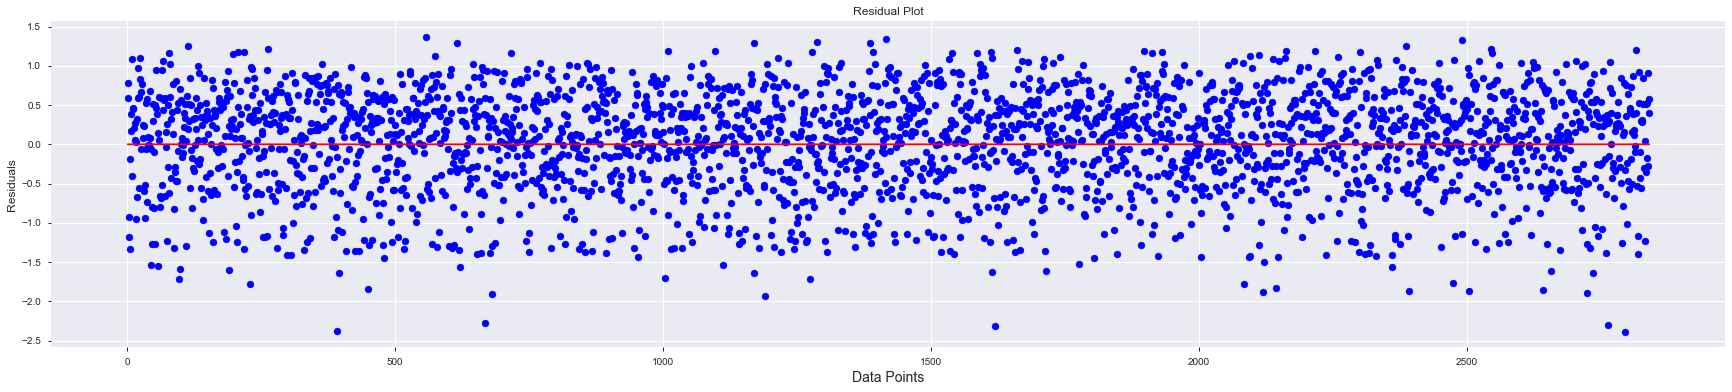

In [78]:
f=[i for i in range(1,len(y_pred)+1)]
plt.figure(figsize=(30,6))
plt.scatter(f,(y_test-y_pred),color='blue')
plt.plot(f,y_pred*0,color='red')
plt.ylabel("Residuals",fontsize=12)
plt.xlabel("Data Points",fontsize=14)
plt.title('Residual Plot')

In [79]:
Y.head()

Item_Outlet_Sales
0           8.225808
1           6.096776
2           7.648868
3           6.597664
4           6.903451

In [80]:
X.head()

Ones  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     1         0.015920  5.524692                     1999.0   
1     1         0.019095  3.897299                     2009.0   
2     1         0.016621  4.960170                     1999.0   
3     1         0.000000  5.210005                     1998.0   
4     1         0.000000  4.004810                     1987.0   

   Outlet_Identifier  Outlet_Location_Type  Outlet_Type  Outlet_Size  
0                  9                     0            1            1  
1                  3                     2            2            1  
2                  9                     0            1            1  
3                  0                     2            0            1  
4                  1                     2            1            0

# Applying one hot encoder on categorical columns

In [81]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(X['Outlet_Identifier'], prefix = 'Outlet_Identifier')
# Drop column B as it is now encoded
X = X.drop('Outlet_Identifier',axis = 1)
# Join the encoded df
X = X.join(one_hot)

In [82]:
X.head()

Ones  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     1         0.015920  5.524692                     1999.0   
1     1         0.019095  3.897299                     2009.0   
2     1         0.016621  4.960170                     1999.0   
3     1         0.000000  5.210005                     1998.0   
4     1         0.000000  4.004810                     1987.0   

   Outlet_Location_Type  Outlet_Type  Outlet_Size  Outlet_Identifier_0  \
0                     0            1            1                    0   
1                     2            2            1                    0   
2                     0            1            1                    0   
3                     2            0            1                    1   
4                     2            1            0                    0   

   Outlet_Identifier_1  Outlet_Identifier_2  Outlet_Identifier_3  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    1                    0                    0   

   Outlet_Identifier_4  Outlet_Identifier_5  Outlet_Identifier_6  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Outlet_Identifier_7  Outlet_Identifier_8  Outlet_Identifier_9  
0                    0                    0                    1  
1                    0                    0                    0  
2                    0                    0                    1  
3                    0                    0                    0  
4                    0                    0                    0

In [83]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(X['Outlet_Type'], prefix = 'Outlet_Type')
# Drop column B as it is now encoded
X = X.drop('Outlet_Type',axis = 1)
# Join the encoded df
X = X.join(one_hot)

In [84]:
X.head()

Ones  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     1         0.015920  5.524692                     1999.0   
1     1         0.019095  3.897299                     2009.0   
2     1         0.016621  4.960170                     1999.0   
3     1         0.000000  5.210005                     1998.0   
4     1         0.000000  4.004810                     1987.0   

   Outlet_Location_Type  Outlet_Size  Outlet_Identifier_0  \
0                     0            1                    0   
1                     2            1                    0   
2                     0            1                    0   
3                     2            1                    1   
4                     2            0                    0   

   Outlet_Identifier_1  Outlet_Identifier_2  Outlet_Identifier_3  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    1                    0                    0   

   Outlet_Identifier_4  Outlet_Identifier_5  Outlet_Identifier_6  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Outlet_Identifier_7  Outlet_Identifier_8  Outlet_Identifier_9  \
0                    0                    0                    1   
1                    0                    0                    0   
2                    0                    0                    1   
3                    0                    0                    0   
4                    0                    0                    0   

   Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  
0              0              1              0              0  
1              0              0              1              0  
2              0              1              0              0  
3              1              0              0              0  
4              0              1              0              0

In [85]:
Y.head()

Item_Outlet_Sales
0           8.225808
1           6.096776
2           7.648868
3           6.597664
4           6.903451

In [86]:
#Spliting the data set into train and test models
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=1/3,random_state=3)


In [87]:
#Applying linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
lr=regressor.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

y_pred=regressor.predict(x_test)
y_pred


[[ 0.00000000e+00  1.10230523e-01  1.00744315e+00 -1.60473260e+10
   7.27743279e+09 -1.11060636e+00  7.27786586e+10 -1.99814061e+11
   1.28409891e+11  9.93454140e+10 -1.21281713e+11 -9.23240729e+10
   8.02679130e+10  4.81732611e+10 -2.47859359e+10  7.30871601e+09
  -5.05122404e+10  4.55598938e+10  9.94415898e+10 -9.40247464e+10]]
[3.2025736e+13]


array([[7.83984375],
       [7.4921875 ],
       [6.3515625 ],
       ...,
       [7.87890625],
       [7.359375  ],
       [4.48046875]])

In [88]:
from sklearn.metrics import r2_score
R2score=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE :',rmse) 
print('R2 :',R2score)

RMSE : 0.49784383045229874
R2 : 0.7599131469706779


Text(0.5, 1.0, 'Residual Plot')

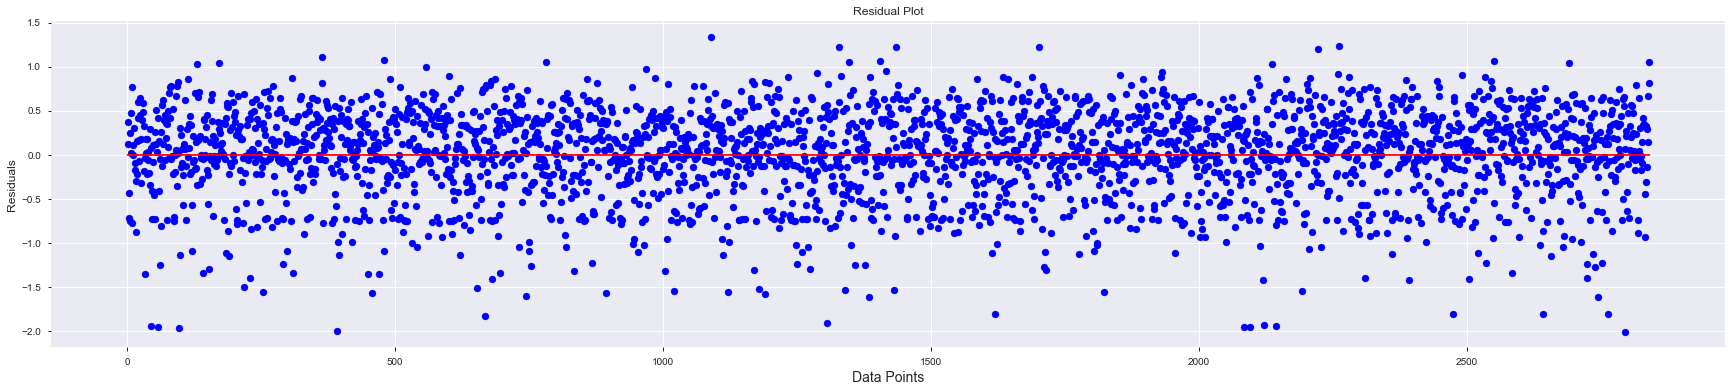

In [89]:
f=[i for i in range(1,len(y_pred)+1)]
plt.figure(figsize=(30,6))
plt.scatter(f,(y_test-y_pred),color='blue')
plt.plot(f,y_pred*0,color='red')
plt.ylabel("Residuals",fontsize=12)
plt.xlabel("Data Points",fontsize=14)
plt.title('Residual Plot')

In [90]:
import statsmodels.api as sm
regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     2091.
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:54:09   Log-Likelihood:                -6324.0
No. Observations:                8523   AIC:                         1.267e+04
Df Residuals:                    8510   BIC:                         1.277e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Ones                         -0.0073      0.001    -13.988      0.000      -0.008      -0.006
Item_Visibility               0.0262      0.126      0.207      0.836      -0.222       0.274
Item_MRP                      1.0094      0.011     94.778      0.000       0.988       1.030
Outlet_Establishment_Year     0.0021    8.6e-05     23.875      0.000       0.002       0.002
Outlet_Location_Type         -0.4133      0.038    -10.745      0.000      -0.489      -0.338
Outlet_Size                  -1.0925      0.085    -12.805      0.000      -1.260      -0.925
Outlet_Identifier_0          -0.5998      0.013    -46.294      0.000      -0.625      -0.574
Outlet_Identifier_1          -0.9414      0.072    -13.095      0.000      -1.082      -0.800
Outlet_Identifier_2          -0.2126      0.027     -7.858      0.000      -0.266      -0.160
Outlet_Identifier_3           0.1216      0.007     16.341      0.000       0.107       0.136
Outlet_Identifier_4          -0.3006      0.014    -21.151      0.000      -0.328      -0.273
Outlet_Identifier_5           0.4900      0.008     63.762      0.000       0.475       0.505
Outlet_Identifier_6           0.8745      0.063     13.976      0.000       0.752       0.997
Outlet_Identifier_7           0.7840      0.063     12.500      0.000       0.661       0.907
Outlet_Identifier_8           0.4165      0.027     15.235      0.000       0.363       0.470
Outlet_Identifier_9          -0.6396      0.064    -10.031      0.000      -0.765      -0.515
Outlet_Type_0                -0.9004      0.011    -85.396      0.000      -0.921      -0.880
Outlet_Type_1                 0.2815      0.012     22.690      0.000       0.257       0.306
Outlet_Type_2                 0.1216      0.007     16.341      0.000       0.107       0.136
Outlet_Type_3                 0.4900      0.008     63.762      0.000       0.475       0.505
==============================================================================
Omnibus:                      931.411   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1371.501
Skew:                          -0.825   Prob(JB):                    1.52e-298
Kurtosis:                       4.068   Cond. No.                     1.23e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.24e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [91]:
X.columns


Index(['Ones', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9',
       'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [92]:
#Removed Last columns of One Hot developed columns
X=X[[ 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8',
       'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2']]

In [93]:
#Spliting the data set into train and test models
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=1/3,random_state=3)

#import linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
lr=regressor.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

y_pred=regressor.predict(x_test)
print(y_pred)


from sklearn.metrics import r2_score
R2score=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE :',rmse) 
print('R2 :',R2score)

[[ 1.10454764e-01  1.00739082e+00 -3.96001560e+09 -6.69212017e+08
  -1.11069065e+00  2.25082118e+10 -4.61817631e+10  3.23493368e+10
   2.88749828e+10 -3.03104149e+10 -3.72009720e+10  2.04692900e+10
   1.25492588e+10 -7.92003119e+09 -8.22898109e+09  1.69008223e+10
   2.89644195e+10]]
[7.89917035e+12]
[[7.83691406]
 [7.49121094]
 [6.3515625 ]
 ...
 [7.87890625]
 [7.36035156]
 [4.48339844]]
RMSE : 0.4978111035171632
R2 : 0.7599447112811147


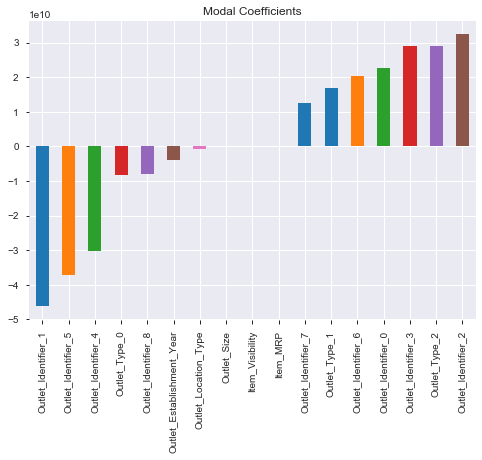

In [94]:
predictors=x_train.columns
coef=pd.Series(lr.coef_[0],predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficients')

In [95]:
from sklearn.linear_model import Ridge

ridreg=Ridge(alpha=0.01,normalize=False)
m=ridreg.fit(x_train,y_train)
pred=ridreg.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)
print('Coeff: ',m.coef_)
print('Intercept :',m.intercept_)
print('RMSE :',rmse)
print('R2:',r2)

Coeff:  [[ 0.11019329  1.00741493  0.01881808 -0.05842154 -1.10822672 -1.00438461
  -0.81789458 -0.0652876  -0.11856841  0.21549803  0.88591539  1.08679499
   1.0299355   1.09815514 -0.78888659  0.02153961 -0.11856841]]
Intercept : [-33.88261384]
RMSE : 0.4977919267203189
R2: 0.7599632058578818


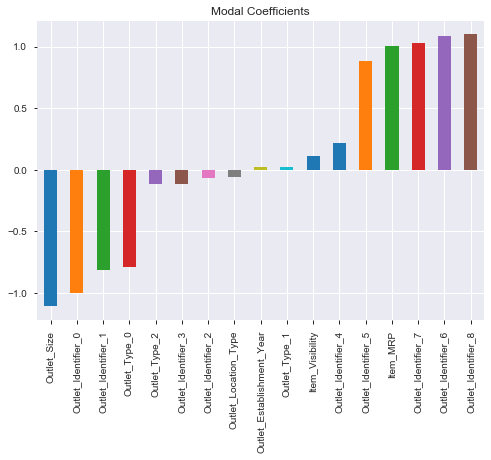

In [96]:
predictors=x_train.columns
coef=pd.Series(ridreg.coef_[0],predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficients')

In [97]:
from sklearn.linear_model import Lasso

lassoreg=Lasso(alpha=0.01,normalize=False)
m=lassoreg.fit(x_train,y_train)
pred=lassoreg.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)
print('Coeff: ',m.coef_)
print('Intercept :',m.intercept_)
print('RMSE :',rmse)
print('R2:',r2)

Coeff:  [-0.          0.98614047 -0.00290657 -0.         -0.         -0.
 -0.          0.         -0.         -0.          0.42218825  0.
 -0.         -0.         -1.83299803  0.02825594 -0.        ]
Intercept : [8.49536242]
RMSE : 0.5095518206006864
R2: 0.7484879277952995


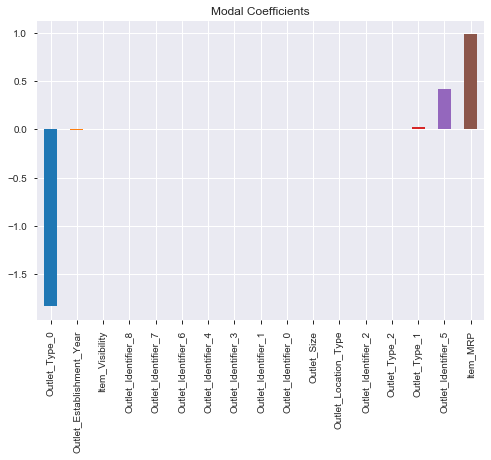

In [98]:
predictors=x_train.columns
coef=pd.Series(lassoreg.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficients')

Text(0.5, 1.0, 'Residual Plot')

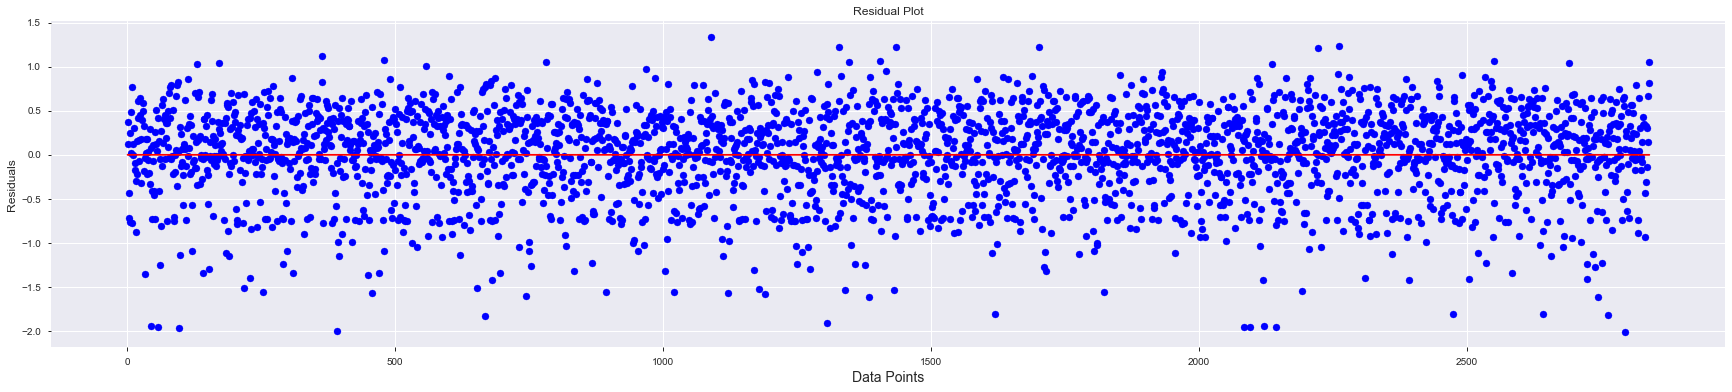

In [99]:
f=[i for i in range(1,len(y_pred)+1)]
plt.figure(figsize=(30,6))
plt.scatter(f,(y_test-y_pred),color='blue')
plt.plot(f,y_pred*0,color='red')
plt.ylabel("Residuals",fontsize=12)
plt.xlabel("Data Points",fontsize=14)
plt.title('Residual Plot')

## Analysis on the steps I applied
### Data Cleaning :
- Removed outliers by capping on countinuous numerical variables
- Replaced missing values of numerical data with mean
- Imputed missing values using Naive Bayes on categorical variable Outlet_Size
- Applied label encoding to categorical variables
- On the encoded data applied Backend elimination for feature selection and found the following columns as needed to find the     dependent variable :Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Identifier,     Outlet_Type
- Then applied one hot encoding for better usage categorical variables 
- Splited data to divide train and test data set and applied linear regression on that and obtained the R2 score                     '0.7421720092154922'
- Model which got developed with out applying Lasso or Ridge is showing better R2 score than after applying Lasso or Ridge .

# Applying model developed on the Test Document

In [100]:
Sales_DF_Main.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     2.332144         0.015920  5.524692                     1999.0   
1     1.934416         0.019095  3.897299                     2009.0   
2     2.917771         0.016621  4.960170                     1999.0   
3     3.005683         0.000000  5.210005                     1998.0   
4     2.295560         0.000000  4.004810                     1987.0   

   Item_Outlet_Sales  Item_Identifier  Item_Fat_Content  Item_Type  \
0           8.225808              156                 0          4   
1           6.096776                8                 1         14   
2           7.648868              662                 0         10   
3           6.597664             1121                 1          6   
4           6.903451             1297                 0          9   

   Outlet_Identifier  Outlet_Location_Type  Outlet_Type  Outlet_Size  
0                  9                     0            1            1  
1                  3                     2            2            1  
2                  9                     0            1            1  
3                  0                     2            0            1  
4                  1                     2            1            0

In [101]:
Sales_DF_Main.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size'],
      dtype='object')

In [102]:
#Showing Preiously Developed model 
train_final_X=Sales_DF_Main[['Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size']]
train_final_X.head()

Item_Visibility  Item_MRP  Outlet_Establishment_Year  Outlet_Identifier  \
0         0.015920  5.524692                     1999.0                  9   
1         0.019095  3.897299                     2009.0                  3   
2         0.016621  4.960170                     1999.0                  9   
3         0.000000  5.210005                     1998.0                  0   
4         0.000000  4.004810                     1987.0                  1   

   Outlet_Location_Type  Outlet_Type  Outlet_Size  
0                     0            1            1  
1                     2            2            1  
2                     0            1            1  
3                     2            0            1  
4                     2            1            0

In [103]:
train_final_Y=Sales_DF_Main[['Item_Outlet_Sales']]
train_final_Y.head()

Item_Outlet_Sales
0           8.225808
1           6.096776
2           7.648868
3           6.597664
4           6.903451

# Applying all the changes applied on the Train dataset so to apply regressor developed for predicting

In [104]:
#Loading Test Data into a DataFrame
Sales_DF_Test=pd.read_csv('C:/Users/Amruth PC/Desktop/Assignments_submission/ML/Assignment1_PGD B7/Test.csv')
Sales_DF_Test

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
5              FDH56        9.800          Regular         0.063817   
6              FDL48       19.350          Regular         0.082602   
7              FDC48          NaN          Low Fat         0.015782   
8              FDN33        6.305          Regular         0.123365   
9              FDA36        5.985          Low Fat         0.005698   
10             FDT44       16.600          Low Fat         0.103569   
11             FDQ56        6.590          Low Fat         0.105811   
12             NCC54          NaN          Low Fat         0.171079   
13             FDU11        4.785          Low Fat         0.092738   
14             DRL59       16.750               LF         0.021206   
15             FDM24        6.135          Regular         0.079451   
16             FDI57       19.850          Low Fat         0.054135   
17             DRC12       17.850          Low Fat         0.037981   
18             NCM42          NaN          Low Fat         0.028184   
19             FDA46       13.600          Low Fat         0.196898   
20             FDA31        7.100          Low Fat         0.109920   
21             NCJ31       19.200          Low Fat         0.182619   
22             FDG52       13.650               LF         0.065631   
23             NCL19          NaN          Low Fat         0.027447   
24             FDS10       19.200          Low Fat         0.035179   
25             FDX22        6.785          Regular         0.038455   
26             NCF19       13.000          Low Fat         0.035102   
27             NCE06        5.825          Low Fat         0.091485   
28             DRC27       13.800          Low Fat         0.058102   
29             FDE21       12.800               LF         0.022940   
...              ...          ...              ...              ...   
5651           FDD23        9.500          Regular         0.048645   
5652           FDP32        6.650          Low Fat         0.087847   
5653           FDO31        6.760          Regular         0.028977   
5654           FDQ57        7.275          Low Fat         0.000000   
5655           FDX32          NaN          Regular         0.099375   
5656           FDC39          NaN          Low Fat         0.158425   
5657           FDU55       16.200          Low Fat         0.035911   
5658           FDL45       15.600          Low Fat         0.037656   
5659           DRK37        5.000          Low Fat         0.044073   
5660           FDK22        9.800          Low Fat         0.026065   
5661           DRG37          NaN          Low Fat         0.000000   
5662           FDK22        9.800          Low Fat         0.026234   
5663           DRH36       16.200          Low Fat         0.033516   
5664           DRC36       13.000          Regular         0.045168   
5665           DRE03          NaN          Low Fat         0.024110   
5666           FDF34        9.300          Regular         0.014019   
5667           FDZ22        9.395          Low Fat         0.045270   
5668           FDC44       15.600          Low Fat         0.288892   
5669           FDN31          NaN          Low Fat         0.072529   
5670           FDO03       10.395          Regular         0.037092   
5671           FDA01       15.000              reg         0.054463   
5672           NCH42        6.860          Low Fat         0.036594   
5673           FDF46        7.070          Low Fat         0.094053   
5674           DRL35       15.700          Low Fat         0.030704   
5675           FDW46       13

In [105]:
Sales_DF_Test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [106]:
#Applying replace to remove duplicates
Sales_DF_Test['Item_Fat_Content']=Sales_DF['Item_Fat_Content'].replace(to_replace ="reg", 
                 value ="Regular")
Sales_DF_Test['Item_Fat_Content']=Sales_DF['Item_Fat_Content'].replace(to_replace ="LF", 
                 value ="Low Fat")
Sales_DF_Test['Item_Fat_Content']=Sales_DF['Item_Fat_Content'].replace(to_replace ="low fat", 
                 value ="Low Fat") 

In [107]:
# Creating a new dataset with only numeric columns and variable columns
numeric_var_names=[key for key in dict(Sales_DF_Test.dtypes) if dict(Sales_DF_Test.dtypes)[key] in ['float64', 'int64']]
catag_var_names=[key for key in dict(Sales_DF_Test.dtypes) if dict(Sales_DF_Test.dtypes)[key] in [ 'O']]
print(numeric_var_names)
print(catag_var_names)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [108]:
Sales_DF_Test_Num=Sales_DF_Test[numeric_var_names]
Sales_DF_Test_Num.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year
0       20.750         0.007565  107.8622                       1999
1        8.300         0.038428   87.3198                       2007
2       14.600         0.099575  241.7538                       1998
3        7.315         0.015388  155.0340                       2007
4          NaN         0.118599  234.2300                       1985

In [109]:
#Capping to remove outliers in all numerical columns
def outlier_capping(x):
    ul = x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))
    ll = x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))
    x = x.clip_upper(ul)
    x = x.clip_lower(ll)
    return x

Sales_DF_Test_Num=Sales_DF_Test_Num.apply(lambda x: outlier_capping(x))
Sales_DF_Test_Num.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year
0       20.750         0.007565  107.8622                     1999.0
1        8.300         0.038428   87.3198                     2007.0
2       14.600         0.099575  241.7538                     1998.0
3        7.315         0.015388  155.0340                     2007.0
4          NaN         0.118599  234.2300                     1985.0

In [110]:
#Handling missings values - imputing with the mean
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

Sales_DF_Test_Num=Sales_DF_Test_Num.apply(lambda x: Missing_imputation(x))

In [111]:
Sales_DF_Test_Num.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year
0    20.750000         0.007565  107.8622                     1999.0
1     8.300000         0.038428   87.3198                     2007.0
2    14.600000         0.099575  241.7538                     1998.0
3     7.315000         0.015388  155.0340                     2007.0
4    12.695633         0.118599  234.2300                     1985.0

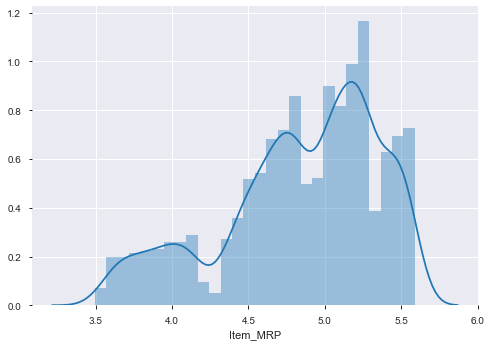

In [112]:
#Using Log Tranformation to cntrol skewness in the data
Sales_DF_Test_Num["Item_MRP"]= np.log(Sales_DF_Test_Num["Item_MRP"]+1)
sns.distplot(Sales_DF_Test_Num.Item_MRP)

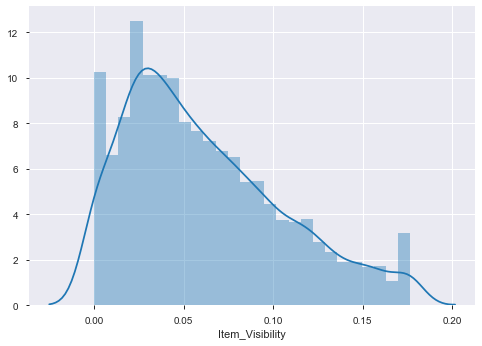

In [113]:
Sales_DF_Test_Num["Item_Visibility"]= np.log(Sales_DF_Test_Num["Item_Visibility"]+1)
sns.distplot(Sales_DF_Test_Num.Item_Visibility)

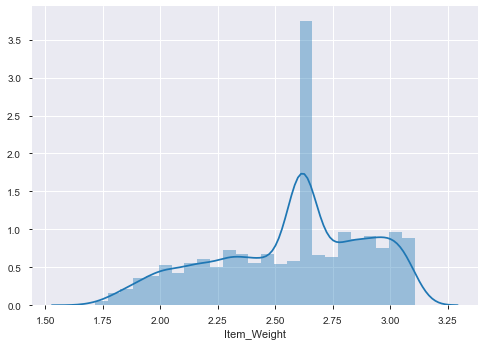

In [114]:
Sales_DF_Test_Num["Item_Weight"]= np.log(Sales_DF_Test_Num["Item_Weight"]+1)
sns.distplot(Sales_DF_Test_Num.Item_Weight)


In [115]:
Sales_DF_Test_Cat=Sales_DF_Test[catag_var_names]
Sales_DF_Test_Cat.head()

Item_Identifier Item_Fat_Content    Item_Type Outlet_Identifier Outlet_Size  \
0           FDW58          Low Fat  Snack Foods            OUT049      Medium   
1           FDW14          Regular        Dairy            OUT017         NaN   
2           NCN55          Low Fat       Others            OUT010         NaN   
3           FDQ58          Regular  Snack Foods            OUT017         NaN   
4           FDY38          Low Fat        Dairy            OUT027      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [116]:
#Model after control the skewness
Sales_DF_Test_Updated = pd.concat([Sales_DF_Test_Num, Sales_DF_Test_Cat], axis=1)
Sales_DF_Test_Updated.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     3.079614         0.007536  4.690083                     1999.0   
1     2.230014         0.037708  4.480964                     2007.0   
2     2.747271         0.094924  5.492048                     1998.0   
3     2.118061         0.015271  5.050074                     2007.0   
4     2.617077         0.112077  5.460564                     1985.0   

  Item_Identifier Item_Fat_Content    Item_Type Outlet_Identifier Outlet_Size  \
0           FDW58          Low Fat  Snack Foods            OUT049      Medium   
1           FDW14          Regular        Dairy            OUT017         NaN   
2           NCN55          Low Fat       Others            OUT010         NaN   
3           FDQ58          Regular  Snack Foods            OUT017         NaN   
4           FDY38          Low Fat        Dairy            OUT027      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [117]:
#Applying Label encoding on the categorical columns
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
Sales_DF_Test_Updated['Item_Identifier']=labelencoder_X.fit_transform(Sales_DF_Test_Updated['Item_Identifier'])
Sales_DF_Test_Updated['Item_Fat_Content']=labelencoder_X.fit_transform(Sales_DF_Test_Updated['Item_Fat_Content'])
Sales_DF_Test_Updated['Item_Type']=labelencoder_X.fit_transform(Sales_DF_Test_Updated['Item_Type'])
Sales_DF_Test_Updated['Outlet_Location_Type']=labelencoder_X.fit_transform(Sales_DF_Test_Updated['Outlet_Location_Type'])
Sales_DF_Test_Updated['Outlet_Type']=labelencoder_X.fit_transform(Sales_DF_Test_Updated['Outlet_Type'])
Sales_DF_Test_Updated['Outlet_Identifier']=labelencoder_X.fit_transform(Sales_DF_Test_Updated['Outlet_Identifier'])

In [118]:
Sales_DF_Test_Updated.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     3.079614         0.007536  4.690083                     1999.0   
1     2.230014         0.037708  4.480964                     2007.0   
2     2.747271         0.094924  5.492048                     1998.0   
3     2.118061         0.015271  5.050074                     2007.0   
4     2.617077         0.112077  5.460564                     1985.0   

   Item_Identifier  Item_Fat_Content  Item_Type  Outlet_Identifier  \
0             1103                 0         13                  9   
1             1067                 1          4                  2   
2             1406                 0         11                  0   
3              809                 1         13                  2   
4             1184                 0          4                  5   

  Outlet_Size  Outlet_Location_Type  Outlet_Type  
0      Medium                     0            1  
1         NaN                     1            1  
2         NaN                     2            0  
3         NaN                     1            1  
4      Medium                     2            3

# Applying Bayes on the test data set

In [119]:
#1st step removing null valued columns from the Dataset
Imputer_Test_apply=Sales_DF_Test_Updated[Sales_DF_Test_Updated['Outlet_Size'].isnull()][['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type','Outlet_Size']]
Imputer_Test_apply.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
1     2.230014         0.037708  4.480964                     2007.0   
2     2.747271         0.094924  5.492048                     1998.0   
3     2.118061         0.015271  5.050074                     2007.0   
8     1.988559         0.116329  4.572064                     2002.0   
9     1.943765         0.005682  5.235869                     2007.0   

   Item_Identifier  Item_Fat_Content  Item_Type  Outlet_Identifier  \
1             1067                 1          4                  2   
2             1406                 0         11                  0   
3              809                 1         13                  2   
8              668                 1         13                  7   
9              170                 1          0                  2   

   Outlet_Location_Type  Outlet_Type Outlet_Size  
1                     1            1         NaN  
2                     2            0         NaN  
3                     1            1         NaN  
8                     1            1         NaN  
9                     1            1         NaN

In [120]:
#2nd step collecing the non null values to prepare a model for applying Bayes
Imputer_train=Sales_DF_Test_Updated[Sales_DF_Test_Updated['Outlet_Size'].notnull()][['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type','Outlet_Size']]
Imputer_train.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     3.079614         0.007536  4.690083                     1999.0   
4     2.617077         0.112077  5.460564                     1985.0   
5     2.379546         0.061864  4.771948                     1997.0   
6     3.013081         0.079367  3.933851                     2009.0   
7     2.617077         0.015659  4.407441                     1985.0   

   Item_Identifier  Item_Fat_Content  Item_Type  Outlet_Identifier  \
0             1103                 0         13                  9   
4             1184                 0          4                  5   
5              461                 1          6                  8   
6              604                 1          0                  3   
7              266                 0          0                  5   

   Outlet_Location_Type  Outlet_Type Outlet_Size  
0                     0            1      Medium  
4                     2            3      Medium  
5                     0            1       Small  
6                     2            2      Medium  
7                     2            3      Medium

In [121]:
#Collected independent variables to train and test
X_train_main=Imputer_train[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type']]

In [122]:
#Collected independent variables to train and test
X_train_main=Imputer_train[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type']]

In [123]:
#Collected dependent variable to train and test
Y_train_main=Imputer_train[['Outlet_Size']]

In [124]:
#Null valued independent variables data assigned to test variable
X_test_main=Imputer_Test_apply[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type']]
X_test_main.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
1     2.230014         0.037708  4.480964                     2007.0   
2     2.747271         0.094924  5.492048                     1998.0   
3     2.118061         0.015271  5.050074                     2007.0   
8     1.988559         0.116329  4.572064                     2002.0   
9     1.943765         0.005682  5.235869                     2007.0   

   Item_Identifier  Item_Fat_Content  Item_Type  Outlet_Identifier  \
1             1067                 1          4                  2   
2             1406                 0         11                  0   
3              809                 1         13                  2   
8              668                 1         13                  7   
9              170                 1          0                  2   

   Outlet_Location_Type  Outlet_Type  
1                     1            1  
2                     2            0  
3                     1            1  
8                     1            1  
9                     1            1

In [125]:
#Dependent Null values and target column
Y_test_main=Imputer_Test_apply[['Outlet_Size']]
Y_test_main.head()

Outlet_Size
1         NaN
2         NaN
3         NaN
8         NaN
9         NaN

In [126]:
#Applying Naive Bayes
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix

In [127]:
#Preparing train and test model from non null valued dependent and independent data
x_train,x_test,y_train,y_test = train_test_split(X_train_main,Y_train_main,test_size=0.20,random_state=40)

In [128]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [129]:
#Prediction imputation worked well with a score of 84.5% 
print("Guassian Score=",gnb.score(x_test,y_test)*100)
prediction = gnb.predict(x_test)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

Guassian Score= 84.1717791411043
Confusion Matrix is :
[[108   0   0]
 [  0 246 129]
 [  0   0 332]]


In [130]:
#Using model developed to predict null values
prediction_to_apply = gnb.predict(X_test_main)
prediction_to_apply

array(['Medium', 'Medium', 'Medium', ..., 'Small', 'Medium', 'Small'],
      dtype='<U6')

In [131]:
Y_test_main=pd.DataFrame(prediction_to_apply)
Y_test_main.columns=['Outlet_Size']


In [132]:
#Combining the data set using concat to prepare the model back into old state
Sales_DF_train = pd.concat([X_train_main, Y_train_main], axis=1)
Sales_DF_train.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     3.079614         0.007536  4.690083                     1999.0   
4     2.617077         0.112077  5.460564                     1985.0   
5     2.379546         0.061864  4.771948                     1997.0   
6     3.013081         0.079367  3.933851                     2009.0   
7     2.617077         0.015659  4.407441                     1985.0   

   Item_Identifier  Item_Fat_Content  Item_Type  Outlet_Identifier  \
0             1103                 0         13                  9   
4             1184                 0          4                  5   
5              461                 1          6                  8   
6              604                 1          0                  3   
7              266                 0          0                  5   

   Outlet_Location_Type  Outlet_Type Outlet_Size  
0                     0            1      Medium  
4                     2            3      Medium  
5                     0            1       Small  
6                     2            2      Medium  
7                     2            3      Medium

In [133]:
#Equating index values so concat gets applied on index values
Y_test_main.index=X_test_main.index
Y_test_main.head()

Outlet_Size
1      Medium
2      Medium
3      Medium
8       Small
9      Medium

In [134]:
#Concatenating the predicted value
Sales_DF_test = pd.concat([X_test_main, Y_test_main], axis=1)
Sales_DF_test.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
1     2.230014         0.037708  4.480964                     2007.0   
2     2.747271         0.094924  5.492048                     1998.0   
3     2.118061         0.015271  5.050074                     2007.0   
8     1.988559         0.116329  4.572064                     2002.0   
9     1.943765         0.005682  5.235869                     2007.0   

   Item_Identifier  Item_Fat_Content  Item_Type  Outlet_Identifier  \
1             1067                 1          4                  2   
2             1406                 0         11                  0   
3              809                 1         13                  2   
8              668                 1         13                  7   
9              170                 1          0                  2   

   Outlet_Location_Type  Outlet_Type Outlet_Size  
1                     1            1      Medium  
2                     2            0      Medium  
3                     1            1      Medium  
8                     1            1       Small  
9                     1            1      Medium

In [135]:
#Concateinating the predicted and Non null data set
Sales_DF_Main = pd.concat([Sales_DF_train, Sales_DF_test], axis=0)
Sales_DF_Main=Sales_DF_Main.sort_index()

In [136]:
Sales_DF_Main.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     3.079614         0.007536  4.690083                     1999.0   
1     2.230014         0.037708  4.480964                     2007.0   
2     2.747271         0.094924  5.492048                     1998.0   
3     2.118061         0.015271  5.050074                     2007.0   
4     2.617077         0.112077  5.460564                     1985.0   

   Item_Identifier  Item_Fat_Content  Item_Type  Outlet_Identifier  \
0             1103                 0         13                  9   
1             1067                 1          4                  2   
2             1406                 0         11                  0   
3              809                 1         13                  2   
4             1184                 0          4                  5   

   Outlet_Location_Type  Outlet_Type Outlet_Size  
0                     0            1      Medium  
1                     1            1      Medium  
2                     2            0      Medium  
3                     1            1      Medium  
4                     2            3      Medium

In [137]:
#Applying lable encoding on Predicted Outlet_Size column
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
Sales_DF_Main['Outlet_Size']=labelencoder_X.fit_transform(Sales_DF_Main['Outlet_Size'])

In [138]:
Sales_DF_Main.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     3.079614         0.007536  4.690083                     1999.0   
1     2.230014         0.037708  4.480964                     2007.0   
2     2.747271         0.094924  5.492048                     1998.0   
3     2.118061         0.015271  5.050074                     2007.0   
4     2.617077         0.112077  5.460564                     1985.0   

   Item_Identifier  Item_Fat_Content  Item_Type  Outlet_Identifier  \
0             1103                 0         13                  9   
1             1067                 1          4                  2   
2             1406                 0         11                  0   
3              809                 1         13                  2   
4             1184                 0          4                  5   

   Outlet_Location_Type  Outlet_Type  Outlet_Size  
0                     0            1            1  
1                     1            1            1  
2                     2            0            1  
3                     1            1            1  
4                     2            3            1

# Selecting the features we found after backend elimination

In [139]:
Data_Test=Sales_DF_Main[['Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Size','Outlet_Identifier','Outlet_Type']]
Data_Test

Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0            0.007536  4.690083                     1999.0   
1            0.037708  4.480964                     2007.0   
2            0.094924  5.492048                     1998.0   
3            0.015271  5.050074                     2007.0   
4            0.112077  5.460564                     1985.0   
5            0.061864  4.771948                     1997.0   
6            0.079367  3.933851                     2009.0   
7            0.015659  4.407441                     1985.0   
8            0.116329  4.572064                     2002.0   
9            0.005682  5.235869                     2007.0   
10           0.098550  4.782032                     2007.0   
11           0.100579  4.458881                     2002.0   
12           0.157926  5.486536                     1985.0   
13           0.088686  4.814700                     1999.0   
14           0.020985  3.970854                     1987.0   
15           0.076452  5.028060                     1999.0   
16           0.052721  5.297201                     2002.0   
17           0.037277  5.263823                     2009.0   
18           0.027794  4.706744                     1985.0   
19           0.176543  5.271530                     1998.0   
20           0.104288  5.170529                     1987.0   
21           0.167732  5.484463                     2004.0   
22           0.063567  3.886504                     1997.0   
23           0.027077  4.965268                     1985.0   
24           0.034574  5.202532                     2004.0   
25           0.037734  5.349451                     1998.0   
26           0.034500  3.883693                     2004.0   
27           0.087539  5.089997                     1997.0   
28           0.056477  5.504031                     1997.0   
29           0.022681  4.766857                     2004.0   
...               ...       ...                        ...   
5651         0.047499  5.232123                     1987.0   
5652         0.084201  4.850215                     2002.0   
5653         0.028565  4.398097                     2004.0   
5654         0.000000  4.980698                     1987.0   
5655         0.094742  4.974515                     1985.0   
5656         0.147061  5.341519                     1985.0   
5657         0.035281  5.569595                     1997.0   
5658         0.036965  4.824068                     1987.0   
5659         0.043129  5.246250                     1999.0   
5660         0.025731  5.377059                     1987.0   
5661         0.000000  5.054953                     1985.0   
5662         0.025896  5.372427                     2007.0   
5663         0.032967  4.302301                     2009.0   
5664         0.044178  5.161382                     2009.0   
5665         0.023824  3.851674                     1985.0   
5666         0.013922  5.287804                     1997.0   
5667         0.044275  4.420345                     1997.0   
5668         0.176543  4.754898                     1998.0   
5669         0.070019  5.242027                     1985.0   
5670         0.036420  5.439970                     2007.0   
5671         0.053031  4.104136                     1999.0   
5672         0.035940  5.447173                     1999.0   
5673         0.089889  4.762887                     2009.0   
5674         0.030242  3.790465                     1997.0   
5675         0.068043  4.165865                     1999.0   
5676         0.013406  4.958046                     1997.0   
5677         0.133648  5.136650                     2009.0   
5678         0.070951  4.785356                     2002.0   
5679         0.000000  5.373526                     2007.0   
5680         0.099592  4.391927                     2002.0   

      Outlet_Location_Type  Outlet_Size  Outlet_Identifier  Outlet_Type  
0                        0            1                  9            1  
1            

In [140]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(Data_Test['Outlet_Identifier'], prefix = 'Outlet_Identifier')
# Drop column B as it is now encoded
Data_Test = Data_Test.drop('Outlet_Identifier',axis = 1)
# Join the encoded df
Data_Test = Data_Test.join(one_hot)

In [141]:
Data_Test.head()

Item_Visibility  Item_MRP  Outlet_Establishment_Year  Outlet_Location_Type  \
0         0.007536  4.690083                     1999.0                     0   
1         0.037708  4.480964                     2007.0                     1   
2         0.094924  5.492048                     1998.0                     2   
3         0.015271  5.050074                     2007.0                     1   
4         0.112077  5.460564                     1985.0                     2   

   Outlet_Size  Outlet_Type  Outlet_Identifier_0  Outlet_Identifier_1  \
0            1            1                    0                    0   
1            1            1                    0                    0   
2            1            0                    1                    0   
3            1            1                    0                    0   
4            1            3                    0                    0   

   Outlet_Identifier_2  Outlet_Identifier_3  Outlet_Identifier_4  \
0                    0                    0                    0   
1                    1                    0                    0   
2                    0                    0                    0   
3                    1                    0                    0   
4                    0                    0                    0   

   Outlet_Identifier_5  Outlet_Identifier_6  Outlet_Identifier_7  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    1                    0                    0   

   Outlet_Identifier_8  Outlet_Identifier_9  
0                    0                    1  
1                    0                    0  
2                    0                    0  
3                    0                    0  
4                    0                    0

In [142]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(Data_Test['Outlet_Type'], prefix = 'Outlet_Type')
# Drop column B as it is now encoded
Data_Test = Data_Test.drop('Outlet_Type',axis = 1)
# Join the encoded df
Data_Test = Data_Test.join(one_hot)

In [143]:
Data_Test.columns

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9',
       'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [144]:
Data_Test=Data_Test[['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8',
       'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2']]

In [145]:
Data_Test.head()

Item_Visibility  Item_MRP  Outlet_Establishment_Year  Outlet_Location_Type  \
0         0.007536  4.690083                     1999.0                     0   
1         0.037708  4.480964                     2007.0                     1   
2         0.094924  5.492048                     1998.0                     2   
3         0.015271  5.050074                     2007.0                     1   
4         0.112077  5.460564                     1985.0                     2   

   Outlet_Size  Outlet_Identifier_0  Outlet_Identifier_1  Outlet_Identifier_2  \
0            1                    0                    0                    0   
1            1                    0                    0                    1   
2            1                    1                    0                    0   
3            1                    0                    0                    1   
4            1                    0                    0                    0   

   Outlet_Identifier_3  Outlet_Identifier_4  Outlet_Identifier_5  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    1   

   Outlet_Identifier_6  Outlet_Identifier_7  Outlet_Identifier_8  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  
0              0              1              0  
1              0              1              0  
2              1              0              0  
3              0              1              0  
4              0              0              0

In [146]:
Y_Final_Pred=regressor.predict(Data_Test)
print(Y_Final_Pred)

[[7.37304688]
 [7.19238281]
 [6.24023438]
 ...
 [7.39550781]
 [8.08789062]
 [7.00195312]]


In [147]:
Y_Final=pd.DataFrame(Y_Final_Pred)
Y_Final.columns=['Item_Outlet_Sales']

In [148]:
Y_Final.head()

Item_Outlet_Sales
0           7.373047
1           7.192383
2           6.240234
3           7.763672
4           8.645508

# Inverting the log transformation

In [149]:
Y_Final["Item_Outlet_Sales"]= np.exp(Y_Final["Item_Outlet_Sales"])-1

In [150]:
Y_Final

Item_Outlet_Sales
0           1591.478482
1           1328.266829
2            511.978726
3           2352.530629
4           5683.553212
5           1658.152983
6            620.799185
7           1946.338310
8           1319.211031
9           2835.128828
10          1812.347181
11          1175.515638
12           504.025728
13          1821.223067
14           732.374327
15          2255.747029
16          2721.156531
17          2361.742087
18          2634.829270
19           413.612252
20          2477.551727
21          3654.914560
22           679.250381
23           293.578899
24          2710.543849
25           440.783663
26           717.487593
27          2291.285623
28          3463.732212
29          1744.582780
...                 ...
5651        2619.430117
5652        1739.476251
5653        1204.592664
5654        2023.911450
5655        3477.292791
5656        5059.886148
5657        3694.398773
5658        1734.384662
5659        2799.350873
5660        3023.945753
5661        3730.663437
5662        3260.177971
5663         895.795743
5664        2131.476080
5665        1112.902618
5666        2774.846258
5667        1160.673814
5668         245.370361
5669        4539.981411
5670        3494.318174
5671         886.213753
5672        3426.712601
5673        1433.475688
5674         614.155450
5675         944.356873
5676        1988.628317
5677        2100.466314
5678        1627.651763
5679        3253.814699
5680        1097.777113

[5681 rows x 1 columns]

In [151]:
X_Final=pd.read_csv('C:/Users/Amruth PC/Desktop/Assignments_submission/ML/Assignment1_PGD B7/Test.csv')

# Final Test Data Set with Item_Outlet_Sales

In [152]:
#Final Data Set after Concatinating
#Model after control the skewness
Sales_DF_updated = pd.concat([X_Final, Y_Final], axis=1)
Sales_DF_updated

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
5              FDH56        9.800          Regular         0.063817   
6              FDL48       19.350          Regular         0.082602   
7              FDC48          NaN          Low Fat         0.015782   
8              FDN33        6.305          Regular         0.123365   
9              FDA36        5.985          Low Fat         0.005698   
10             FDT44       16.600          Low Fat         0.103569   
11             FDQ56        6.590          Low Fat         0.105811   
12             NCC54          NaN          Low Fat         0.171079   
13             FDU11        4.785          Low Fat         0.092738   
14             DRL59       16.750               LF         0.021206   
15             FDM24        6.135          Regular         0.079451   
16             FDI57       19.850          Low Fat         0.054135   
17             DRC12       17.850          Low Fat         0.037981   
18             NCM42          NaN          Low Fat         0.028184   
19             FDA46       13.600          Low Fat         0.196898   
20             FDA31        7.100          Low Fat         0.109920   
21             NCJ31       19.200          Low Fat         0.182619   
22             FDG52       13.650               LF         0.065631   
23             NCL19          NaN          Low Fat         0.027447   
24             FDS10       19.200          Low Fat         0.035179   
25             FDX22        6.785          Regular         0.038455   
26             NCF19       13.000          Low Fat         0.035102   
27             NCE06        5.825          Low Fat         0.091485   
28             DRC27       13.800          Low Fat         0.058102   
29             FDE21       12.800               LF         0.022940   
...              ...          ...              ...              ...   
5651           FDD23        9.500          Regular         0.048645   
5652           FDP32        6.650          Low Fat         0.087847   
5653           FDO31        6.760          Regular         0.028977   
5654           FDQ57        7.275          Low Fat         0.000000   
5655           FDX32          NaN          Regular         0.099375   
5656           FDC39          NaN          Low Fat         0.158425   
5657           FDU55       16.200          Low Fat         0.035911   
5658           FDL45       15.600          Low Fat         0.037656   
5659           DRK37        5.000          Low Fat         0.044073   
5660           FDK22        9.800          Low Fat         0.026065   
5661           DRG37          NaN          Low Fat         0.000000   
5662           FDK22        9.800          Low Fat         0.026234   
5663           DRH36       16.200          Low Fat         0.033516   
5664           DRC36       13.000          Regular         0.045168   
5665           DRE03          NaN          Low Fat         0.024110   
5666           FDF34        9.300          Regular         0.014019   
5667           FDZ22        9.395          Low Fat         0.045270   
5668           FDC44       15.600          Low Fat         0.288892   
5669           FDN31          NaN          Low Fat         0.072529   
5670           FDO03       10.395          Regular         0.037092   
5671           FDA01       15.000              reg         0.054463   
5672           NCH42        6.860          Low Fat         0.036594   
5673           FDF46        7.070          Low Fat         0.094053   
5674           DRL35       15.700          Low Fat         0.030704   
5675           FDW46       13